<a href="https://colab.research.google.com/github/Behnam9473/AI/blob/main/CNN_MINST_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use MINST datasets

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data
f_minst = tf.keras.datasets.fashion_mnist

(xtrain, ytrain), (xtest, ytest) = f_minst.load_data()
xtrain, xtest = xtrain / 255.0, xtest / 255.0
print("xtrain shape is = ", xtrain.shape)
print("ytrain shape is = ", ytrain.shape)
print("xtest shape is = ", xtest.shape)
print("ytest shape is = ", ytest.shape)

4422102/4422102 [==============================] - 0s 0us/step
xtrain shape is =  (60000, 28, 28)
ytrain shape is =  (60000,)
xtest shape is =  (10000, 28, 28)
ytest shape is =  (10000,)


Conv layers expect 3D arrays but fashion mnist dataset includ 2D gray pictures hence, we should add 1 dim to Conv layer

In [4]:
xtrain = np.expand_dims(xtrain, -1)
xtest = np.expand_dims(xtest, -1)
print("xtrain shape is = ", xtrain.shape)
print("ytrain shape is = ", ytrain.shape)


xtrain shape is =  (60000, 28, 28, 1)
ytrain shape is =  (60000,)


In [5]:
# number of classes
K = len(set(ytrain)) # using |set| to identify UNIQE calsses
print("number of classes are = ", K)


number of classes are =  10


In [21]:
# Build the model using the functional API
i = Input(shape = xtrain[0].shape) # = (28,28,1)
x = Conv2D(32,(3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation = 'tanh')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'tanh')(x)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation = 'tanh')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)
model = Model(i, x)


In [22]:
from tensorflow.python import metrics
# compile and fit 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 15)



Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5159 - accuracy: 0.8093 - val_loss: 0.4114 - val_accuracy: 0.8454
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3847 - accuracy: 0.8544 - val_loss: 0.3703 - val_accuracy: 0.8624
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3503 - accuracy: 0.8688 - val_loss: 0.3467 - val_accuracy: 0.8710
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3250 - accuracy: 0.8776 - val_loss: 0.3370 - val_accuracy: 0.8773
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3062 - accuracy: 0.8850 - val_loss: 0.3309 - val_accuracy: 0.8774
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2937 - accuracy: 0.8893 - val_loss: 0.3172 - val_accuracy: 0.8844
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2804 - accuracy: 0.8934 - val_loss: 0.3157 - val_accu

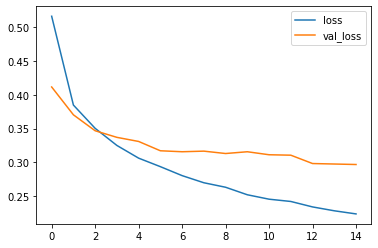

In [23]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

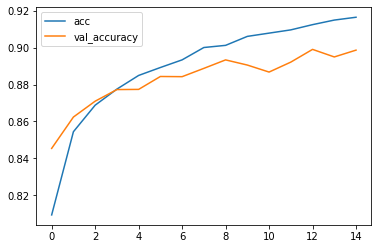

In [24]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[877   0  17  12   2   1  87   0   4   0]
 [  1 976   0  14   3   0   4   0   2   0]
 [ 30   2 812   8  81   0  66   0   1   0]
 [ 17   7  10 903  34   0  29   0   0   0]
 [  2   1  51  22 858   0  64   0   2   0]
 [  0   0   0   1   0 973   0  17   0   9]
 [123   1  62  16  94   0 690   0  14   0]
 [  0   0   0   0   0  11   0 955   0  34]
 [  5   2   3   2   3   2   7   1 973   2]
 [  1   0   0   0   0   6   0  23   0 970]]


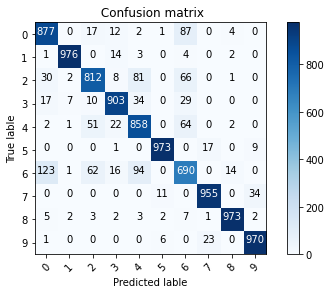

In [31]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plt_CM(cm, classes,
           normalize = False,
           title = ' Confusion matrix',
           cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Confusion matrix, with normalization')
  else:
    print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = (np.arange(len(classes)))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j, i, format(cm[i,j], fmt),
              horizontalalignment = 'center',
              color = 'white' if cm[i,j] > thresh else "black")
    plt.tight_layout()  
    plt.ylabel("True lable")
    plt.xlabel("Predicted lable")
    plt.show()

ptest = model.predict(xtest).argmax(axis = 1)
cm = confusion_matrix(ytest, ptest)
plt_CM(cm, list(range(10)))

In [32]:
# lable mapping....
labels = """
T_shirt
Trouser
Pullover
Dress
Coat
Sandals
Shirt
Sneaker
Bag
Ankle boott""".split()

Text(0.5, 1.0, 'True label is: Shirt and predicted one is: T_shirt')

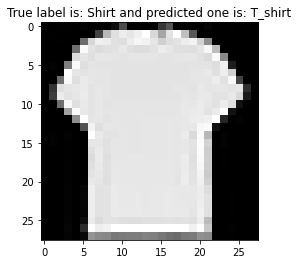

In [33]:
#Some misclassifid examples
misclassified_idx = np.where(ptest != ytest)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(xtest[i].reshape(28, 28),cmap = 'gray')
plt.title('True label is: %s and predicted one is: %s' % (labels[ytest[i]], labels[ptest[i]]))